<a href="https://colab.research.google.com/github/MizanMustakim/data_mining_project/blob/main/Data_mining_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import files
# files.upload()

In [1]:
!pip install --upgrade matplotlib

     |████████████████████████████████| 11.2 MB 8.4 MB/s 
     |████████████████████████████████| 884 kB 52.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
!wget --no-check-certificate \
  https://gtd.terrorismdata.com/app/uploads/_mediavault/2021/02/globalterrorismdb_0221dist.xlsx

--2021-12-08 05:34:39--  https://gtd.terrorismdata.com/app/uploads/_mediavault/2021/02/globalterrorismdb_0221dist.xlsx
Resolving gtd.terrorismdata.com (gtd.terrorismdata.com)... 18.169.202.182
Connecting to gtd.terrorismdata.com (gtd.terrorismdata.com)|18.169.202.182|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99732895 (95M) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘globalterrorismdb_0221dist.xlsx’

globalterrorismdb_0 100%[===================>]  95.11M  20.3MB/s    in 5.6s    

2021-12-08 05:34:45 (16.9 MB/s) - ‘globalterrorismdb_0221dist.xlsx’ saved [99732895/99732895]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df_1 = pd.read_excel("/content/globalterrorismdb_0221dist.xlsx")
df_1.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9,NaN,NaN,0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
print(df_1.shape)

(201183, 135)


In [5]:
print(df_1.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [6]:
col_list = ["iyear", "country_txt", "region", "region_txt", "provstate", "attacktype1_txt", "attacktype1", "success","weaptype1","weaptype1_txt","targtype1_txt", "targtype1", "nkill"]
df_2 = df_1[col_list]

In [7]:
df_2.head()

,iyear,country_txt,region,region_txt,provstate,attacktype1_txt,attacktype1,success,weaptype1,weaptype1_txt,targtype1_txt,targtype1,nkill
0,1970,Dominican Republic,2,Central America & Caribbean,National,Assassination,1,1,13,Unknown,Private Citizens & Property,14,1.0
1,1970,Mexico,1,North America,Federal,Hostage Taking (Kidnapping),6,1,13,Unknown,Government (Diplomatic),7,0.0
2,1970,Philippines,5,Southeast Asia,Tarlac,Assassination,1,1,13,Unknown,Journalists & Media,10,1.0
3,1970,Greece,8,Western Europe,Attica,Bombing/Explosion,3,1,6,Explosives,Government (Diplomatic),7,NaN
4,1970,Japan,4,East Asia,Fukouka,Facility/Infrastructure Attack,7,1,8,Incendiary,Government (Diplomatic),7,NaN


In [8]:
df_2 = df_2.fillna(0)
df_2.head()

,iyear,country_txt,region,region_txt,provstate,attacktype1_txt,attacktype1,success,weaptype1,weaptype1_txt,targtype1_txt,targtype1,nkill
0,1970,Dominican Republic,2,Central America & Caribbean,National,Assassination,1,1,13,Unknown,Private Citizens & Property,14,1.0
1,1970,Mexico,1,North America,Federal,Hostage Taking (Kidnapping),6,1,13,Unknown,Government (Diplomatic),7,0.0
2,1970,Philippines,5,Southeast Asia,Tarlac,Assassination,1,1,13,Unknown,Journalists & Media,10,1.0
3,1970,Greece,8,Western Europe,Attica,Bombing/Explosion,3,1,6,Explosives,Government (Diplomatic),7,0.0
4,1970,Japan,4,East Asia,Fukouka,Facility/Infrastructure Attack,7,1,8,Incendiary,Government (Diplomatic),7,0.0


In [9]:
df_2.shape

(201183, 13)

**Total number of killing on the different regions**

In [10]:
a = df_2.groupby(["region_txt","region", "iyear"])["nkill"].sum().reset_index()
a#.first().head(50)

,region_txt,region,iyear,nkill
0,Australasia & Oceania,12,1970,0.0
1,Australasia & Oceania,12,1971,0.0
2,Australasia & Oceania,12,1972,1.0
3,Australasia & Oceania,12,1973,0.0
4,Australasia & Oceania,12,1974,0.0
...,...,...,...,...
548,Western Europe,8,2015,171.0
549,Western Europe,8,2016,170.0
550,Western Europe,8,2017,83.0
551,Western Europe,8,2018,25.0


In [11]:
print(len(df_2.country_txt.unique().tolist()))

205


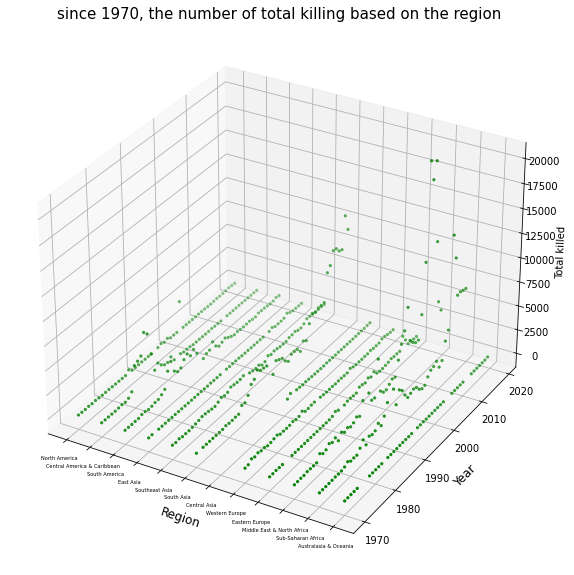

In [12]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection="3d")

plt.rcParams["figure.autolayout"] = True

ax.scatter(a.region, a.iyear, a.nkill, marker=".", c="green")

ax.set_xticks(a.region.unique())
ax.set_xticklabels(a.region_txt.unique(), fontsize=5)

# ax.set_zticklabels([1, "2K", "4K", "6K", "8K", "10K", "12K", "14K"])

ax.set_title("since 1970, the number of total killing based on the region", fontsize=15)

ax.set_xlabel("Region", fontsize=12)

ax.set_ylabel("Year", fontsize=12, rotation= 45)

ax.set_zlabel("Total killed", fontsize=10)

# ax.grid(False)

fig.savefig("3d_killing_analysis.jpg")
plt.show()


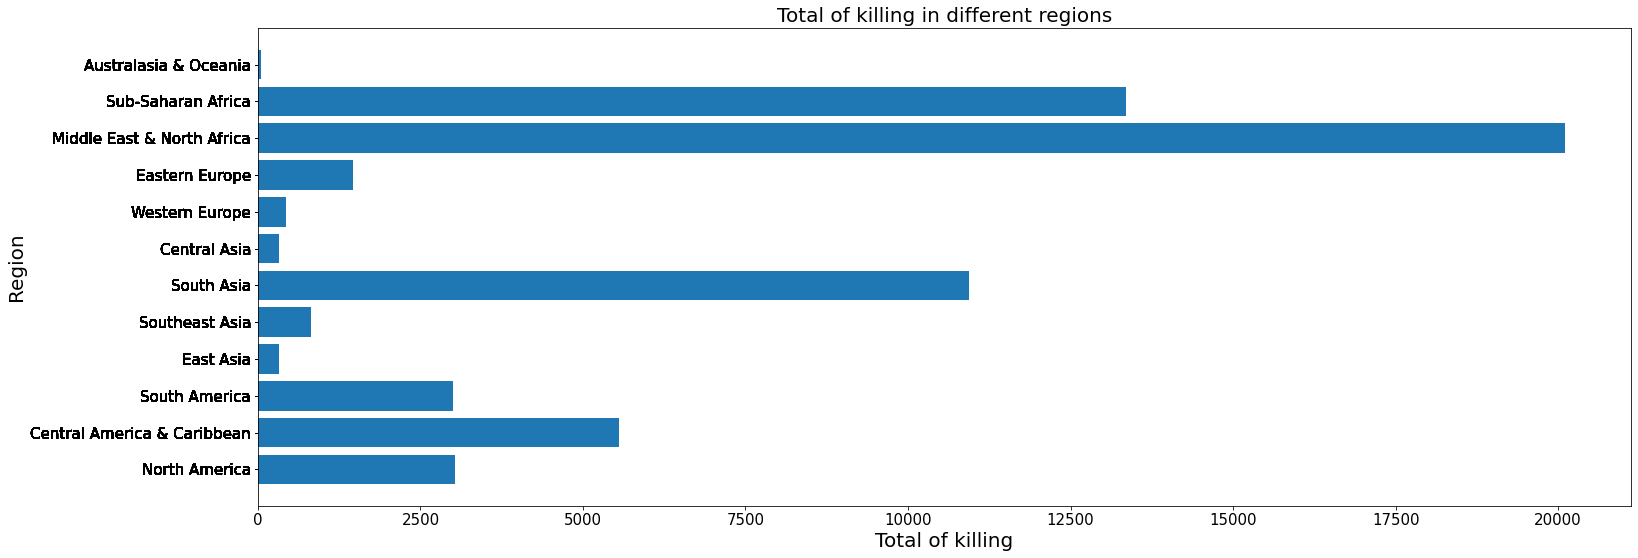

In [13]:
fig = plt.figure(figsize=(23,8))
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20, titlesize=20)
# plt.xlim( right=max(a.nkill)+1000)
plt.barh(a.region,a.nkill)
plt.yticks(a.region, a.region_txt)
plt.title("Total of killing in different regions")
plt.xlabel("Total of killing")
plt.ylabel("Region")
fig.savefig("bar_plot.jpg")
plt.show()

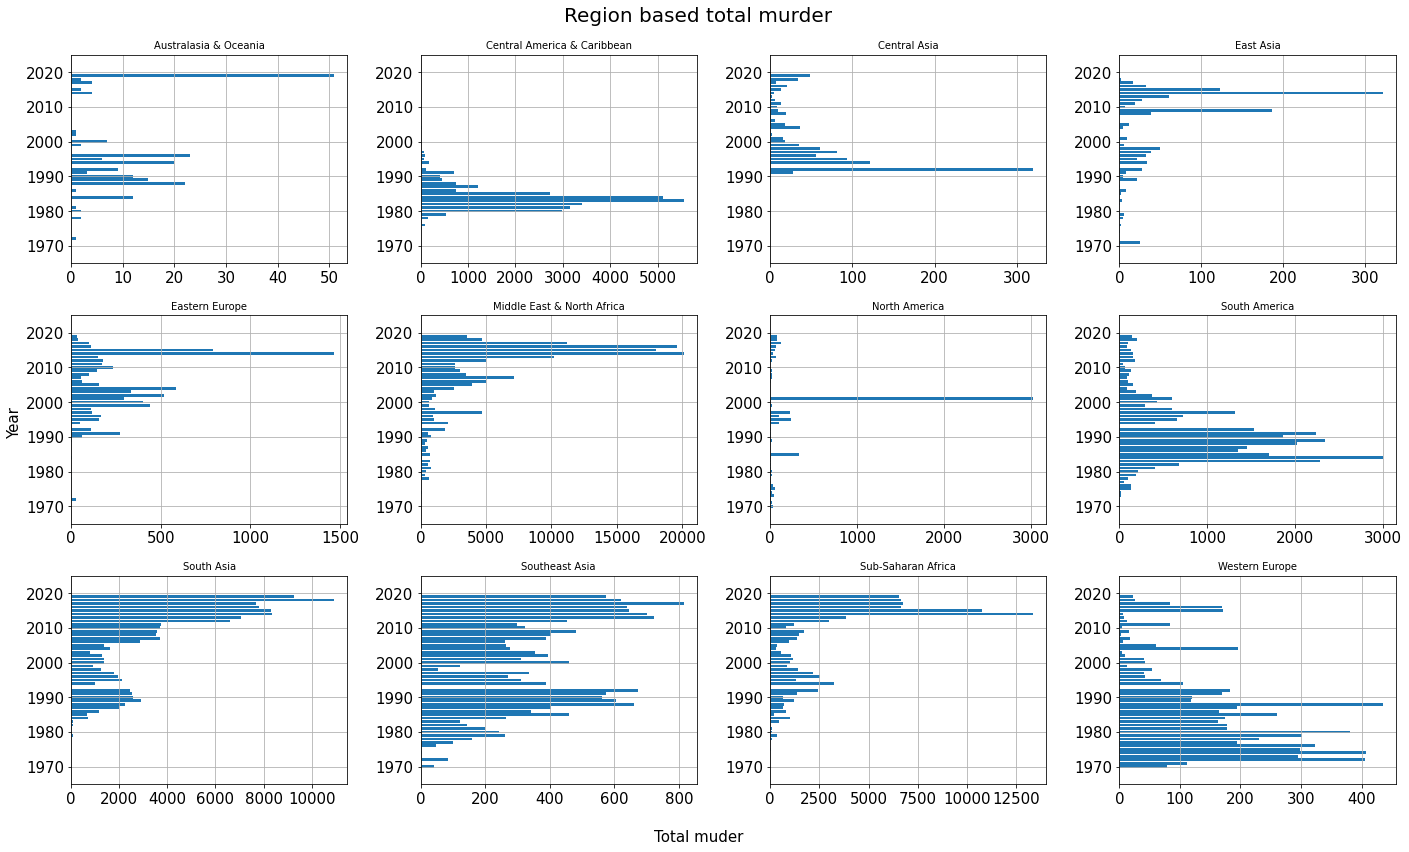

In [15]:
# region = "Middle East & North Africa" #@param ['Australasia & Oceania', 'Central America & Caribbean','Central Asia', 'East Asia', 'Eastern Europe','Middle East & North Africa', 'North America', 'South America','South Asia', 'Southeast Asia', 'Sub-Saharan Africa','Western Europe']

region = a.region_txt.unique().tolist()
fig = plt.figure(figsize=(20,12))

fig.supxlabel("Total muder", fontsize=15)
fig.supylabel("Year", fontsize=15)
fig.suptitle("Region based total murder", fontsize=20)

for i in range(len(region)):
    ax = fig.add_subplot(3,4,i+1)
    b = a[a["region_txt"] == region[i]]
    b = b.groupby("iyear")["nkill"].sum().reset_index()
    ax.barh(b.iyear, b.nkill)
    ax.set_ylim(1965, 2025)
    ax.set_title("{}".format(region[i]), fontsize= 10)
    ax.grid(True)

fig.savefig("region_based_killing_bar.jpg")
plt.show()

In [16]:
a = df_2.groupby(["country_txt","iyear"])["nkill"].sum().reset_index()
a

,country_txt,iyear,nkill
0,Afghanistan,1973,0.0
1,Afghanistan,1979,53.0
2,Afghanistan,1987,0.0
3,Afghanistan,1988,128.0
4,Afghanistan,1989,10.0
...,...,...,...
3965,Zimbabwe,2013,1.0
3966,Zimbabwe,2014,0.0
3967,Zimbabwe,2017,0.0
3968,Zimbabwe,2018,2.0


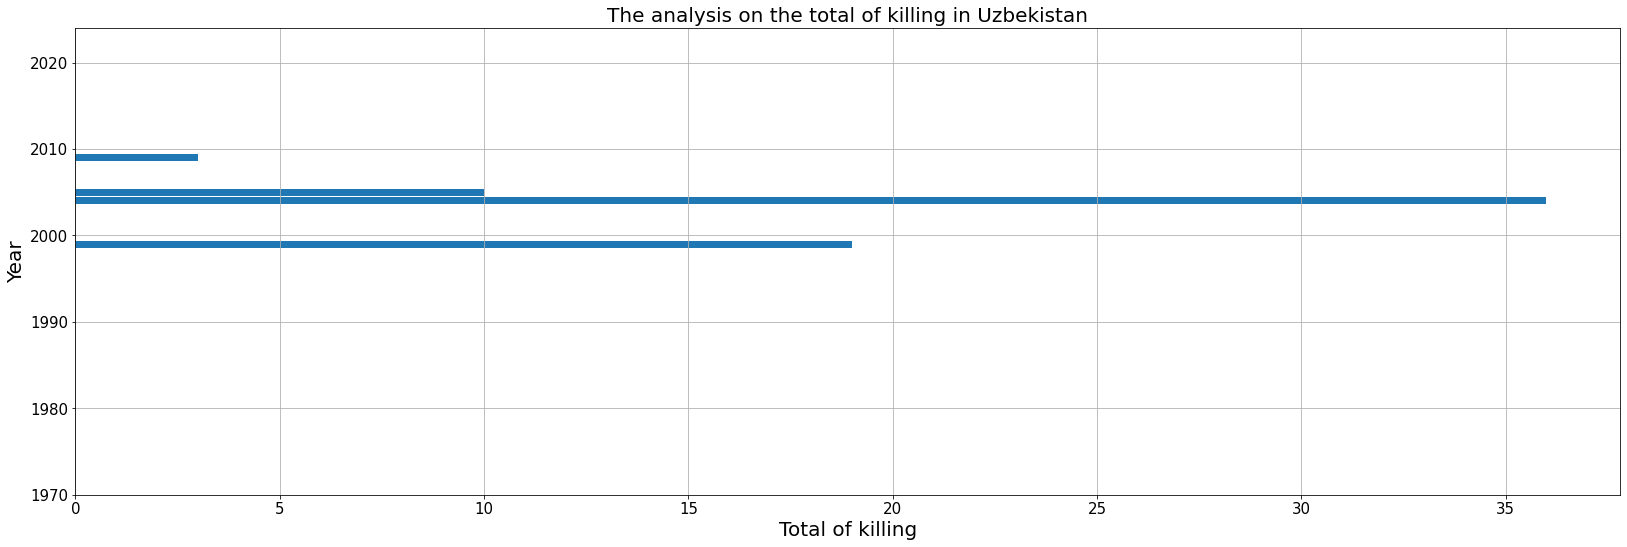

In [ ]:
country = 'Uzbekistan' #@param ['Australia', 'Fiji', 'French Polynesia', 'New Caledonia','New Hebrides', 'New Zealand', 'Papua New Guinea', 'Solomon Islands', 'Vanuatu', 'Wallis and Futuna', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guadeloupe', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Martinique', 'Nicaragua', 'Panama', 'St. Kitts and Nevis', 'St. Lucia', 'Trinidad and Tobago', 'Armenia', 'Azerbaijan', 'Georgia', 'Kazakhstan', 'Kyrgyzstan', 'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'China', 'Hong Kong', 'Japan', 'Macau', 'North Korea', 'South Korea', 'Taiwan', 'Albania', 'Belarus', 'Bosnia-Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Czechoslovakia', 'East Germany (GDR)', 'Estonia', 'Hungary', 'Kosovo', 'Latvia', 'Lithuania', 'Macedonia', 'Moldova', 'Montenegro', 'Poland', 'Romania', 'Russia', 'Serbia', 'Serbia-Montenegro', 'Slovak Republic', 'Slovenia', 'Soviet Union', 'Ukraine', 'Yugoslavia', 'Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'North Yemen', 'Qatar', 'Saudi Arabia', 'South Yemen', 'Syria', 'Tunisia', 'Turkey', 'United Arab Emirates', 'West Bank and Gaza Strip', 'Western Sahara', 'Yemen', 'Canada', 'Mexico', 'United States', 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Falkland Islands', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela', 'Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Mauritius', 'Nepal', 'Pakistan', 'Sri Lanka', 'Brunei', 'Cambodia', 'East Timor', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'South Vietnam', 'Thailand', 'Vietnam', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of the Congo', 'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Peoples Republic of the Congo', 'Republic of the Congo', 'Rhodesia', 'Rwanda', 'Senegal', 'Seychelles', 'Sierra Leone','Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Swaziland','Tanzania', 'Togo', 'Uganda', 'Zaire', 'Zambia', 'Zimbabwe','Andorra', 'Austria', 'Belgium', 'Cyprus', 'Denmark', 'Finland','France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy','Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Portugal','Spain', 'Sweden', 'Switzerland', 'United Kingdom', 'Vatican City','West Germany (FRG)']
fig = plt.figure(figsize=(23,8))

b = a[a["country_txt"] == country]
b = b.groupby("iyear")["nkill"].sum().reset_index()
plt.barh(b.iyear, b.nkill)
plt.ylim(a.iyear.min(), a.iyear.max()+5)
plt.rcParams.update({'font.size': 20})
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.title("The analysis on the total of killing in {}".format(country))
plt.xlabel("Total of killing")
plt.ylabel("Year")
plt.grid(True)
plt.show()

**Target Type** vs **Attack Type**

In [17]:
t = df_2[["attacktype1_txt", "targtype1_txt", "targtype1"]].groupby(["attacktype1_txt", "targtype1_txt", "targtype1"]).agg(**{"target_count":("targtype1_txt","count")}).reset_index()
t

,attacktype1_txt,targtype1_txt,targtype1,target_count
0,Armed Assault,Abortion Related,5,8
1,Armed Assault,Airports & Aircraft,6,114
2,Armed Assault,Business,1,2562
3,Armed Assault,Educational Institution,8,668
4,Armed Assault,Food or Water Supply,9,46
...,...,...,...,...
188,Unknown,Tourists,18,6
189,Unknown,Transportation,19,136
190,Unknown,Unknown,20,81
191,Unknown,Utilities,21,109


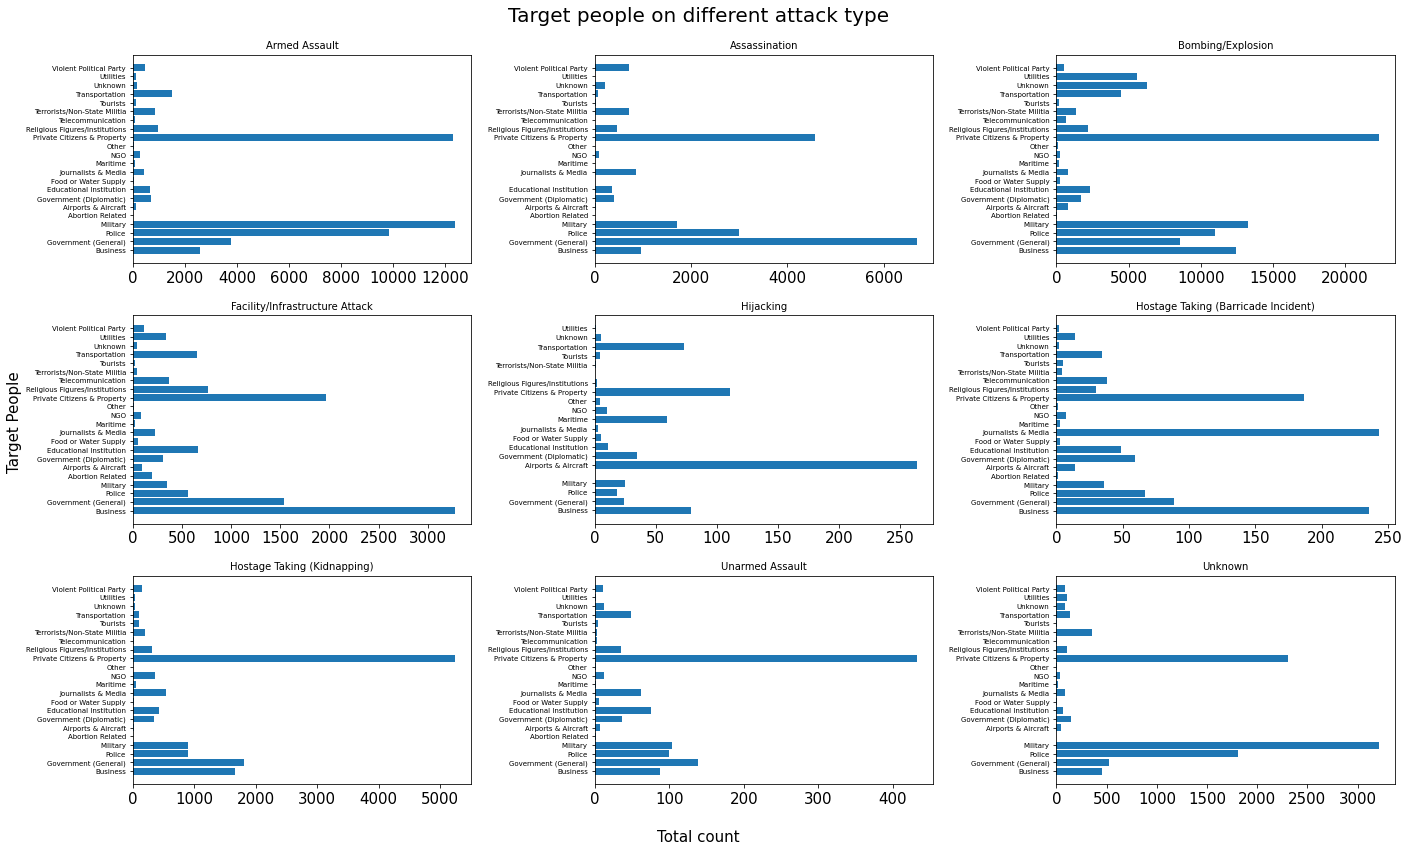

In [19]:
attack = t.attacktype1_txt.unique().tolist()
fig = plt.figure(figsize=(20,12))

fig.supxlabel("Total count", fontsize=15)
fig.supylabel("Target People", fontsize=15)
fig.suptitle("Target people on different attack type", fontsize=20)

for i in range(len(attack)):
    ax = fig.add_subplot(3,3,i+1)
    c = t[t["attacktype1_txt"] == attack[i]]
    plt.rc('ytick', labelsize=7)
    ax.barh(c.targtype1, c.target_count)
    ax.set_yticks(c.targtype1, c.targtype1_txt)

    ax.set_title("{}".format(attack[i]), fontsize= 10)
    # ax.grid(True)

fig.savefig("attack_vs_target.jpg")
plt.show()

**Attack type** vs **Weapon type**

In [20]:
w = df_2[["attacktype1_txt", "weaptype1_txt", "weaptype1"]].groupby(["attacktype1_txt", "weaptype1_txt", "weaptype1"]).agg(**{"weapon_count":("weaptype1_txt","count")}).reset_index()
w.head()

,attacktype1_txt,weaptype1_txt,weaptype1,weapon_count
0,Armed Assault,Chemical,2,2
1,Armed Assault,Explosives,6,2316
2,Armed Assault,Firearms,5,40805
3,Armed Assault,Incendiary,8,2451
4,Armed Assault,Melee,9,1687


In [21]:
w["weaptype1_txt"] = w["weaptype1_txt"].replace(["Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"], "Vehicle_non_explosive")

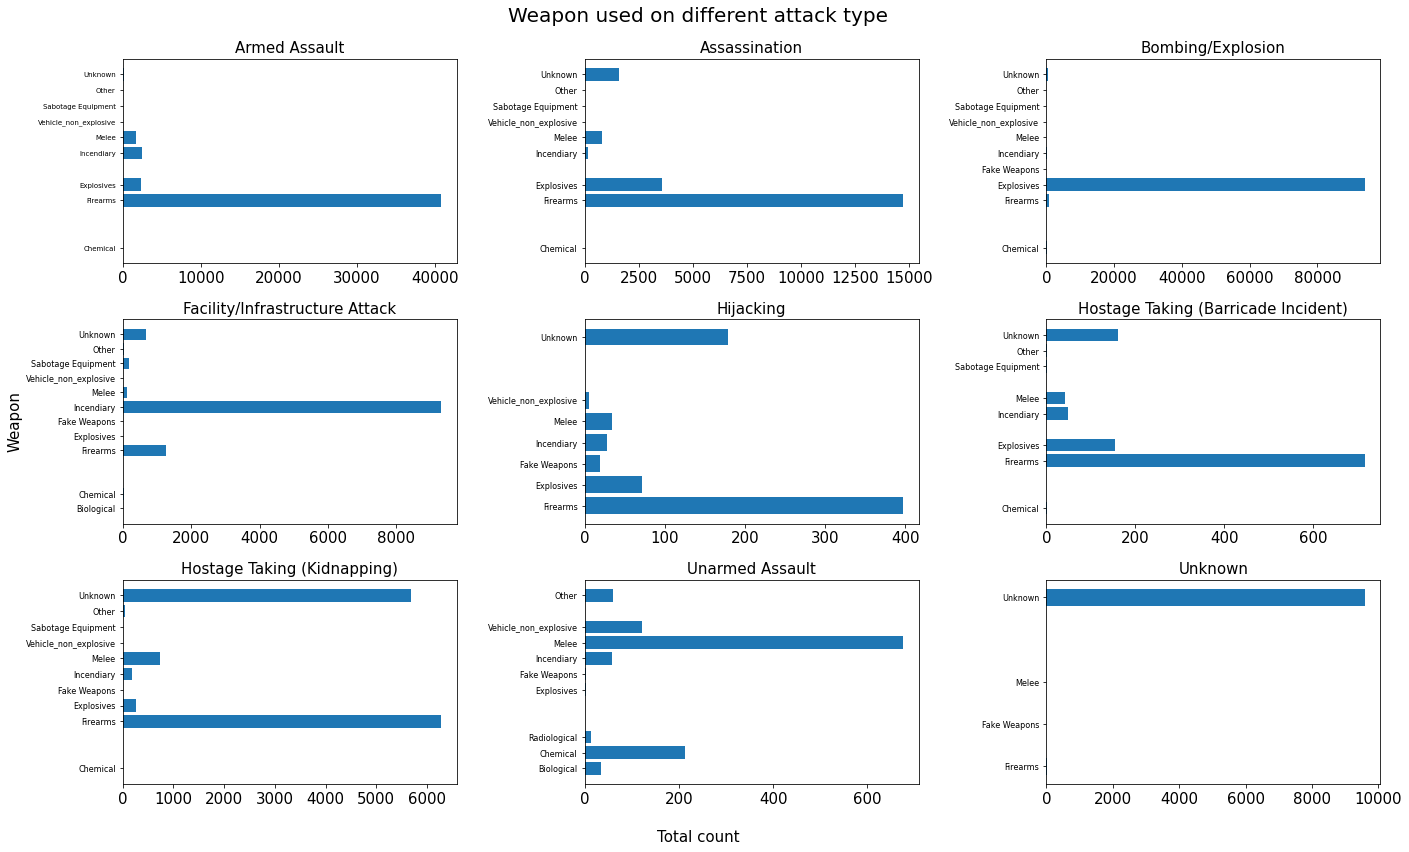

In [22]:
attack = t.attacktype1_txt.unique().tolist()
fig = plt.figure(figsize=(20,12))

fig.supxlabel("Total count", fontsize=15)
fig.supylabel("Weapon", fontsize=15)
fig.suptitle("Weapon used on different attack type", fontsize=20)

for i in range(len(attack)):
    ax = fig.add_subplot(3,3,i+1)
    d = w[w["attacktype1_txt"] == attack[i]]
    plt.rc('ytick', labelsize=8)
    ax.barh(d.weaptype1, d.weapon_count)
    ax.set_yticks(d.weaptype1, d.weaptype1_txt)
    # ax.set_ylim(1970, 2030)
    ax.set_title("{}".format(attack[i]), fontsize= 15)
    # ax.grid(True)

fig.savefig("attack_vs_weapon.jpg")
plt.show()

**Region** vs **Attack Type**

In [23]:
r_a = df_2[["attacktype1_txt", "region_txt", "attacktype1"]].groupby(["region_txt", "attacktype1_txt", "attacktype1"]).agg(**{"attack_count":("attacktype1_txt","count")}).reset_index()
r_a.head()

,region_txt,attacktype1_txt,attacktype1,attack_count
0,Australasia & Oceania,Armed Assault,2,55
1,Australasia & Oceania,Assassination,1,36
2,Australasia & Oceania,Bombing/Explosion,3,74
3,Australasia & Oceania,Facility/Infrastructure Attack,7,91
4,Australasia & Oceania,Hijacking,4,3


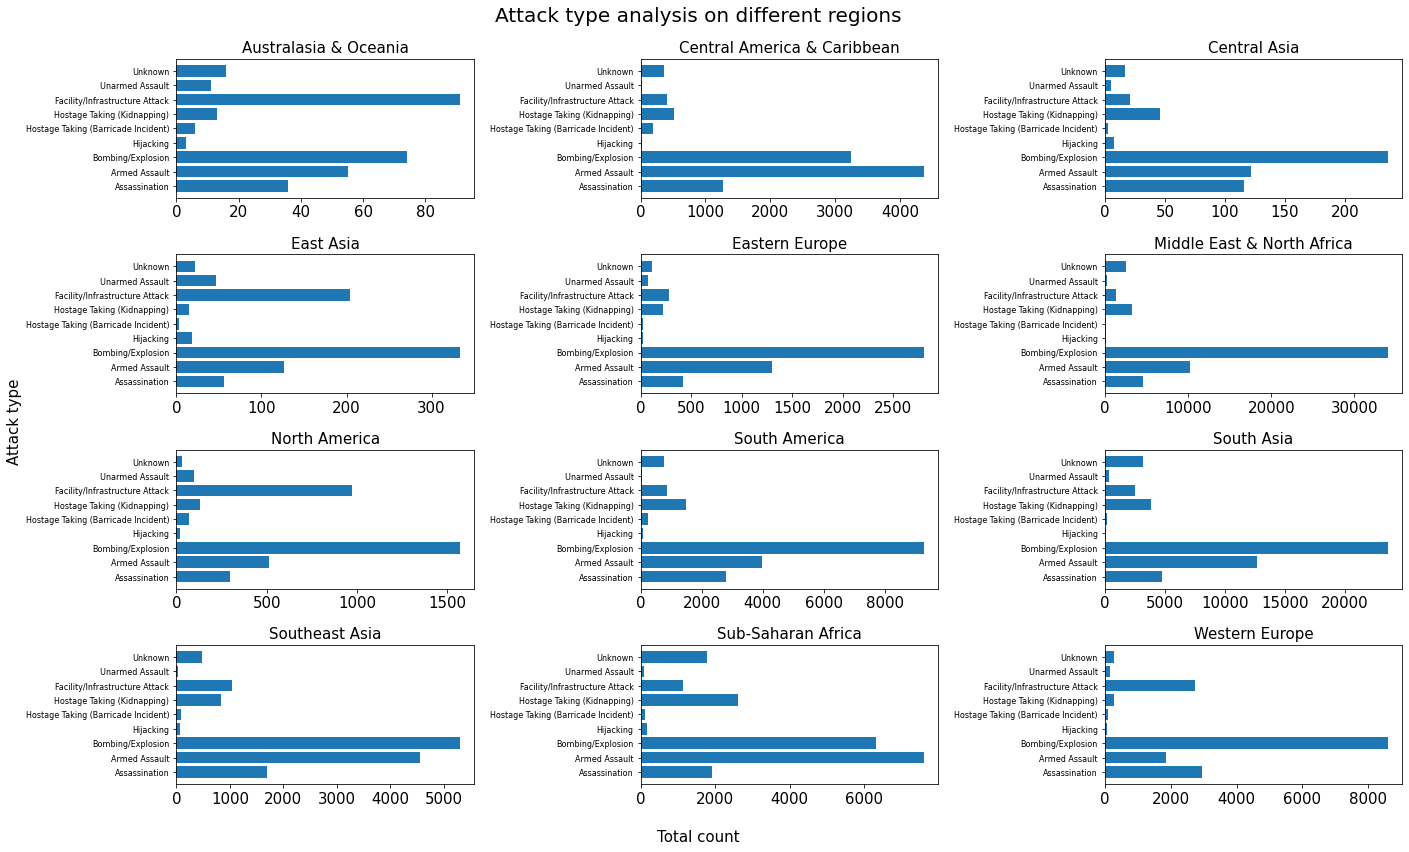

In [24]:
region = r_a.region_txt.unique().tolist()
fig = plt.figure(figsize=(20,12))

fig.supxlabel("Total count", fontsize=15)
fig.supylabel("Attack type", fontsize=15)
fig.suptitle("Attack type analysis on different regions", fontsize=20)

for i in range(len(region)):
    ax = fig.add_subplot(4,3,i+1)
    e = r_a[r_a["region_txt"] == region[i]]
    plt.rc('ytick', labelsize=8)
    ax.barh(e.attacktype1, e.attack_count)
    ax.set_yticks(e.attacktype1, e.attacktype1_txt)
    ax.set_title("{}".format(region[i]), fontsize= 15)
    # ax.grid(True)

fig.savefig("region_vs_attack.jpg")
plt.show()

**Region** vs **Target type**

In [31]:
r_t = df_2[["region_txt", "targtype1_txt",  "targtype1"]].groupby(["region_txt", "targtype1_txt", "targtype1"]).agg(**{"target_count":("targtype1_txt","count")}).reset_index()
r_t.head()

,region_txt,targtype1_txt,targtype1,target_count
0,Australasia & Oceania,Airports & Aircraft,6,7
1,Australasia & Oceania,Business,1,66
2,Australasia & Oceania,Educational Institution,8,8
3,Australasia & Oceania,Food or Water Supply,9,1
4,Australasia & Oceania,Government (Diplomatic),7,30


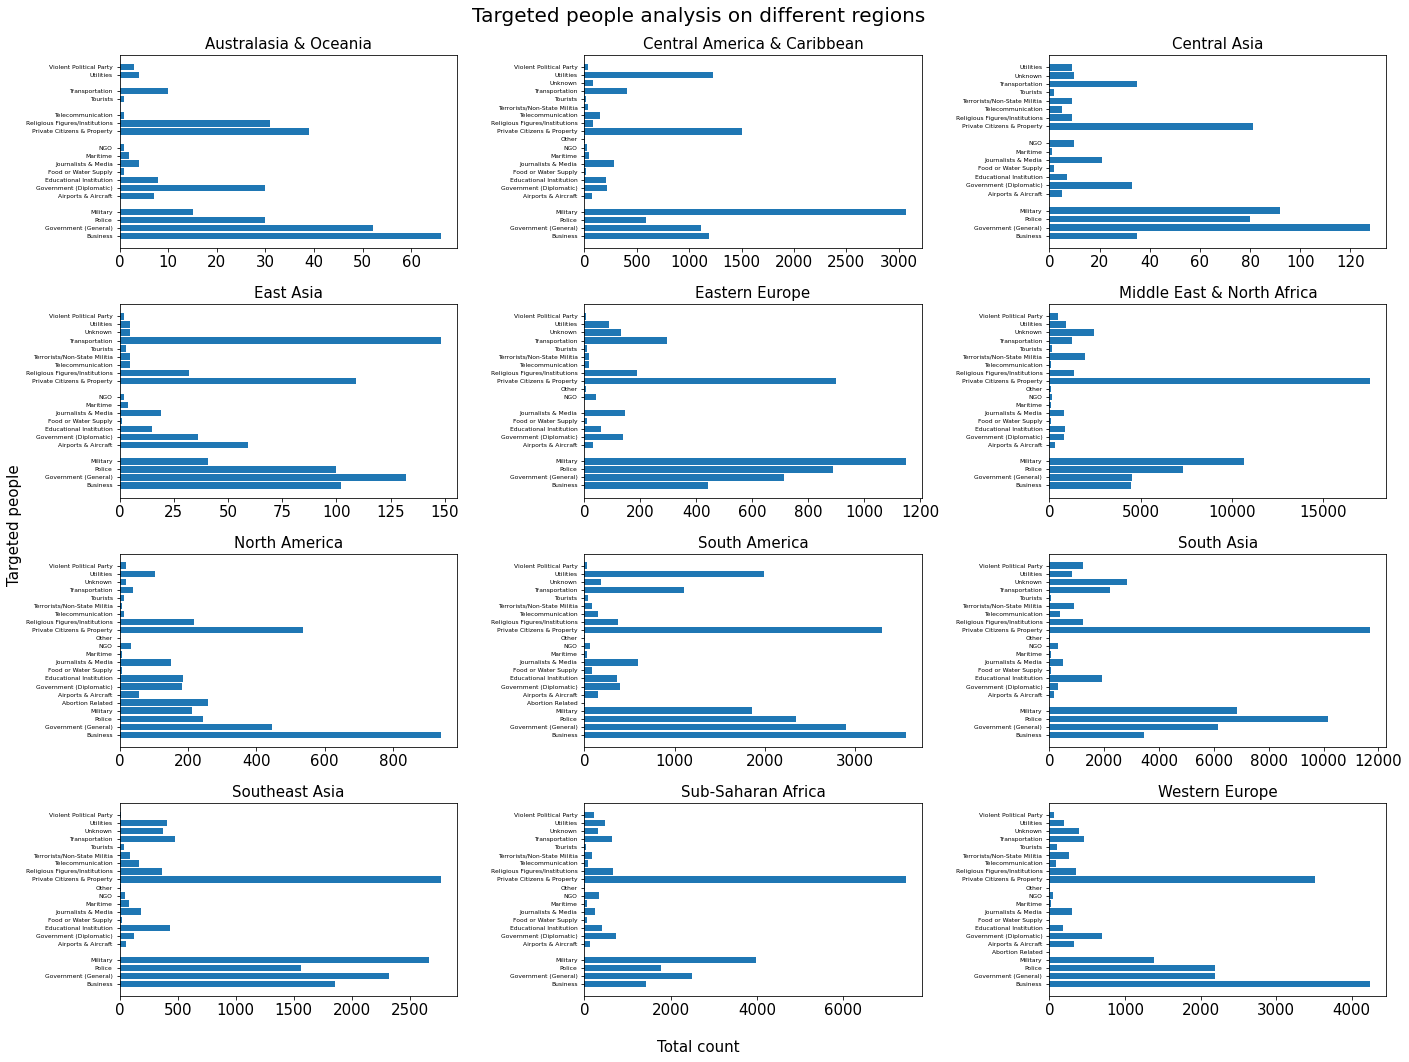

In [27]:
region = r_t.region_txt.unique().tolist()
fig = plt.figure(figsize=(20,15))

fig.supxlabel("Total count", fontsize=15)
fig.supylabel("Targeted people", fontsize=15)
fig.suptitle("Targeted people analysis on different regions", fontsize=20)

for i in range(len(region)):
    ax = fig.add_subplot(4,3,i+1)
    f = r_t[r_t["region_txt"] == region[i]]
    plt.rc('ytick', labelsize=6)
    ax.barh(f.targtype1, f.target_count)
    ax.set_yticks(f.targtype1, f.targtype1_txt)
    ax.set_title("{}".format(region[i]), fontsize= 15)
    # ax.grid(True)

fig.savefig("region_vs_target_people.jpg")
plt.show()

**Geographical Analysis**

In [29]:
import plotly.offline as po
import plotly.graph_objs as pg

In [56]:
ge = df_2[["region_txt", "country_txt", "nkill"]].groupby(["region_txt", "country_txt"]).agg(**{"total_kill":("nkill","sum")}).reset_index()
ge.head()

,region_txt,country_txt,total_kill
0,Australasia & Oceania,Australia,25.0
1,Australasia & Oceania,Fiji,8.0
2,Australasia & Oceania,French Polynesia,0.0
3,Australasia & Oceania,New Caledonia,35.0
4,Australasia & Oceania,New Hebrides,0.0


In [57]:
data = dict(type="choropleth",
            locations= ge["country_txt"],
            locationmode = "country names",
            z = ge["total_kill"],
            text = ge["country_txt"])

In [62]:
layout = dict(title="Country-Attack type projection",
              geo = dict(projection={"type":"hammer"},
                         showlakes = True,
                         lakecolor = "rgb(0,191,255)"))

x = pg.Figure(data = [data], layout = layout)

po.iplot(x)